<a href="https://colab.research.google.com/github/abhidhawale/MachineLearningProjects/blob/master/EDA_Preprocessing_TitanicPassengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis and Preprocessing of the "TitanicPassengers" dataset.
The following actions are executed on the dataset:


1.  Reading dataset from .csv file
2. Dropping irrelevant columns from the dataset for easier processing
3. Checking columns for "Null or Nan" values and replacing them with median or mode of the column for numerical or string values, respectively
4. Converting categorical variables into numerical values by manually assigning values, one-hot encoding or using the LabelEncoder method
5. Displaying statistical information about the dataset and checking if normalization is required

Finally, various visualizations are performed on the preprocessed dataset using the Matplotlib or Seaborn libraries for understanding the data better!




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("/content/dataset-23-titanic_dataset.csv")
#df.head(10)
df = df.drop(["PassengerId", "Ticket", "Cabin", "Name"], axis=1)
df.head()

df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df['Age'] = df['Age'].fillna(df["Age"].median())
df['Embarked'] = df['Embarked'].fillna(df["Embarked"].mode()[0])
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df.loc[df["Sex"] == "male","Sex"] = 0
df.loc[df["Sex"] == "female","Sex"] = 1

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_num = ['Embarked']
le = LabelEncoder()
for i in cat_num:
  df[i] = le.fit_transform(df[i])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [ ]:
df.groupby(['Survived']).size()

Survived
0    549
1    342
dtype: int64

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000


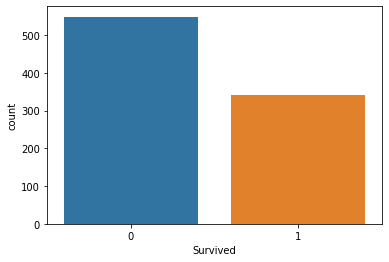

In [ ]:
sns.countplot(x = 'Survived', data = df)

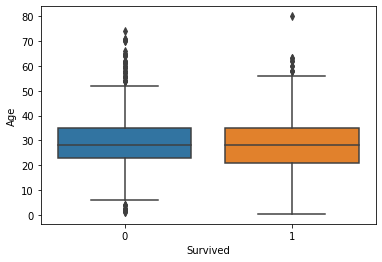

In [ ]:
sns.boxplot(x = 'Survived', y = 'Age', data = df)

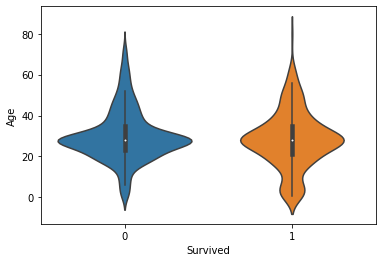

In [ ]:
sns.violinplot(x= 'Survived', y= 'Age', data = df, size= 10) #combination of boxplot and probability distribution function

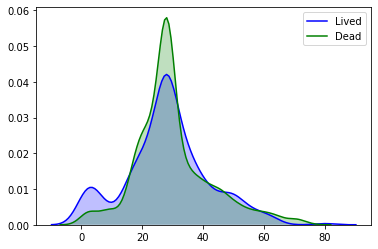

In [ ]:
lived = df.loc[df['Survived'] == 1]
dead = df.loc[df['Survived'] == 0]

sns.kdeplot(lived['Age'], color='b', shade=True, label='Lived')
sns.kdeplot(dead['Age'], color='g', shade=True, label='Dead')

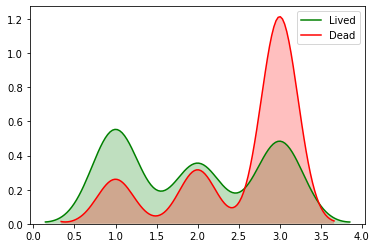

In [ ]:
sns.kdeplot(lived['Pclass'], color='g', shade=True, label='Lived')
sns.kdeplot(dead['Pclass'], color='r', shade=True, label='Dead')